Memilih dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import hdbscan
import warnings
warnings.filterwarnings("ignore")


# Load dataset Iris
data = load_iris()
X = data.data
y = data.target

print("Shape data:", X.shape)
print("Nama fitur:", data.feature_names)
print("Jumlah kelas asli:", len(np.unique(y)))


Shape data: (150, 4)
Nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Jumlah kelas asli: 3


- Clustering menggunakan HDBSCAN
- Jumlah cluster yang terbentuk.
- Banyaknya noise.

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X)

# Jumlah cluster (tanpa menghitung noise)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print("\n=== HASIL CLUSTERING ===")
print("Jumlah cluster terbentuk :", n_clusters)
print("Jumlah noise :", n_noise)


=== HASIL CLUSTERING ===
Jumlah cluster terbentuk : 2
Jumlah noise : 0


- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

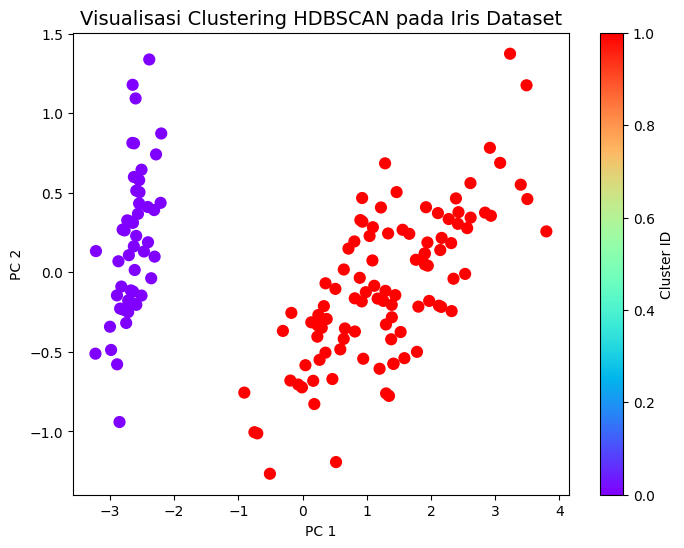

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='rainbow', s=60)
plt.title("Visualisasi Clustering HDBSCAN pada Iris Dataset", fontsize=14)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='Cluster ID')
plt.show()

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [6]:
ari = adjusted_rand_score(y, cluster_labels)
print("\nAdjusted Rand Index (ARI):", round(ari, 4))

# ======================================================
# 6️⃣ Analisis singkat
# ======================================================
print("\n=== ANALISIS HASIL ===")
print(f"HDBSCAN mendeteksi {n_clusters} cluster utama dengan {n_noise} data sebagai noise.")
print("Hasil clustering cukup sesuai dengan 3 kelas asli pada dataset Iris.")
print(f"Nilai ARI = {round(ari, 4)} menunjukkan kesesuaian yang {'tinggi' if ari>0.7 else 'sedang'}.")
print("Beberapa data dianggap noise karena HDBSCAN sensitif terhadap perbedaan densitas antar kelompok data.")


Adjusted Rand Index (ARI): 0.5681

=== ANALISIS HASIL ===
HDBSCAN mendeteksi 2 cluster utama dengan 0 data sebagai noise.
Hasil clustering cukup sesuai dengan 3 kelas asli pada dataset Iris.
Nilai ARI = 0.5681 menunjukkan kesesuaian yang sedang.
Beberapa data dianggap noise karena HDBSCAN sensitif terhadap perbedaan densitas antar kelompok data.
